## Import library

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from config.config import Config
from utilities.llm.gemini.gemini import GeminiLLM
from utilities.prompt_builder.prompt_builder import PromptBuilder

## Read data

In [2]:
## Data Numeric load
df = pd.read_csv("./data/data.csv")
df.head()

,calendar,smr,Ambient_TempAve,Ambient_TempMax,Ambient_TempMin,Blowby_Press_Max,Boost_Press_Max,Cool_Temp_Max,Cool_Temp_Min,ECO_ON,...,Eng_Oil_Tmp_Max,Eng_Speed_Ave,Eng_Speed_Max,Fuel_Rate,LF_Exh_Temp_Max,LR_Exh_Temp_Max,RF_Exh_Temp_Max,RR_Exh_Temp_Max,TM_Oil_Temp_Max,TravelSpeed_Max
0,2024-01-02T03:16:48,62346.3,31,39,25,1339,142,85,26,43927,...,100,1460,2465,86.6,-32768,-32768,969,969,82,436
1,2024-01-04T06:29:28,62366.3,29,40,25,1184,142,85,33,31852,...,98,1350,2525,75.4,-32768,-32768,969,969,82,434
2,2024-01-06T03:21:31,62386.4,27,36,25,1039,142,83,30,45270,...,96,1418,2454,80.7,-32768,-32768,969,969,82,428
3,2024-01-07T15:54:56,62406.4,29,41,25,1273,143,84,36,44294,...,98,1431,2392,80.1,-32768,-32768,969,969,82,435
4,2024-01-09T07:43:00,62426.5,27,35,24,1005,142,84,28,17185,...,94,1468,2476,86.3,-32768,-32768,967,969,80,431


In [3]:
## Data Definition Load 
data_definition = pd.read_csv("./data/data_definition.csv")

data_definition.head()

,Column,Definition,Aggregate,Dimension
0,calendar,Recording time,NaN,datetime
1,smr,Equipment Life,NaN,hour
2,Ambient_TempAve,Ambient temperature,Average,C
3,Ambient_TempMax,Ambient temperature,Maximum,C
4,Ambient_TempMin,Ambient temperature,Minimum,C


## Filtering data

In [4]:
## Remove unexpect number
df = df[(df['LF_Exh_Temp_Max'] > 0) & (df['LR_Exh_Temp_Max'] > 0)]

In [5]:
df['calendar'].info()

<class 'pandas.core.series.Series'>
Index: 17 entries, 16 to 155
Series name: calendar
Non-Null Count  Dtype 
--------------  ----- 
17 non-null     object
dtypes: object(1)
memory usage: 272.0+ bytes


In [6]:
df['calendar'] = pd.to_datetime(df['calendar']).dt.strftime('%Y-%m-%d')
df.head()

,calendar,smr,Ambient_TempAve,Ambient_TempMax,Ambient_TempMin,Blowby_Press_Max,Boost_Press_Max,Cool_Temp_Max,Cool_Temp_Min,ECO_ON,...,Eng_Oil_Tmp_Max,Eng_Speed_Ave,Eng_Speed_Max,Fuel_Rate,LF_Exh_Temp_Max,LR_Exh_Temp_Max,RF_Exh_Temp_Max,RR_Exh_Temp_Max,TM_Oil_Temp_Max,TravelSpeed_Max
16,2024-02-06,62667.3,28,39,24,1013,141,82,24,26509,...,95,1360,2468,72.7,957,956,969,969,80,473
19,2024-02-10,62727.4,27,36,25,1081,143,79,41,21966,...,93,1388,2578,78.0,813,814,914,969,76,456
37,2024-03-22,63088.7,30,38,24,1240,141,88,26,37056,...,97,1462,2493,80.2,786,787,930,969,87,435
39,2024-03-27,63128.8,30,38,26,1380,141,84,31,45085,...,95,1462,2521,75.7,969,949,964,969,87,434
43,2024-04-02,63209.0,28,39,25,1021,142,81,30,30177,...,94,1395,2444,73.8,620,628,969,969,83,424


## EDA

In [7]:
print("Descriptive statistics:")
df.describe().transpose()[['mean', 'min', 'max', 'std']]

Descriptive statistics:


,mean,min,max,std
smr,63890.300000,62667.3,65457.0,844.143137
Ambient_TempAve,28.529412,27.0,30.0,1.124591
Ambient_TempMax,37.294118,33.0,41.0,2.143732
Ambient_TempMin,24.764706,24.0,26.0,0.562296
Blowby_Press_Max,1293.352941,917.0,1916.0,277.655124
Boost_Press_Max,140.294118,134.0,143.0,2.417765
Cool_Temp_Max,83.647059,79.0,88.0,3.200414
Cool_Temp_Min,31.352941,24.0,49.0,6.373198
ECO_ON,39923.647059,21966.0,57226.0,10782.263051
E_Oil_P_Hi_Min,3.352941,3.2,3.5,0.079982


2025-11-25 22:49:36,381 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-11-25 22:49:36,382 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


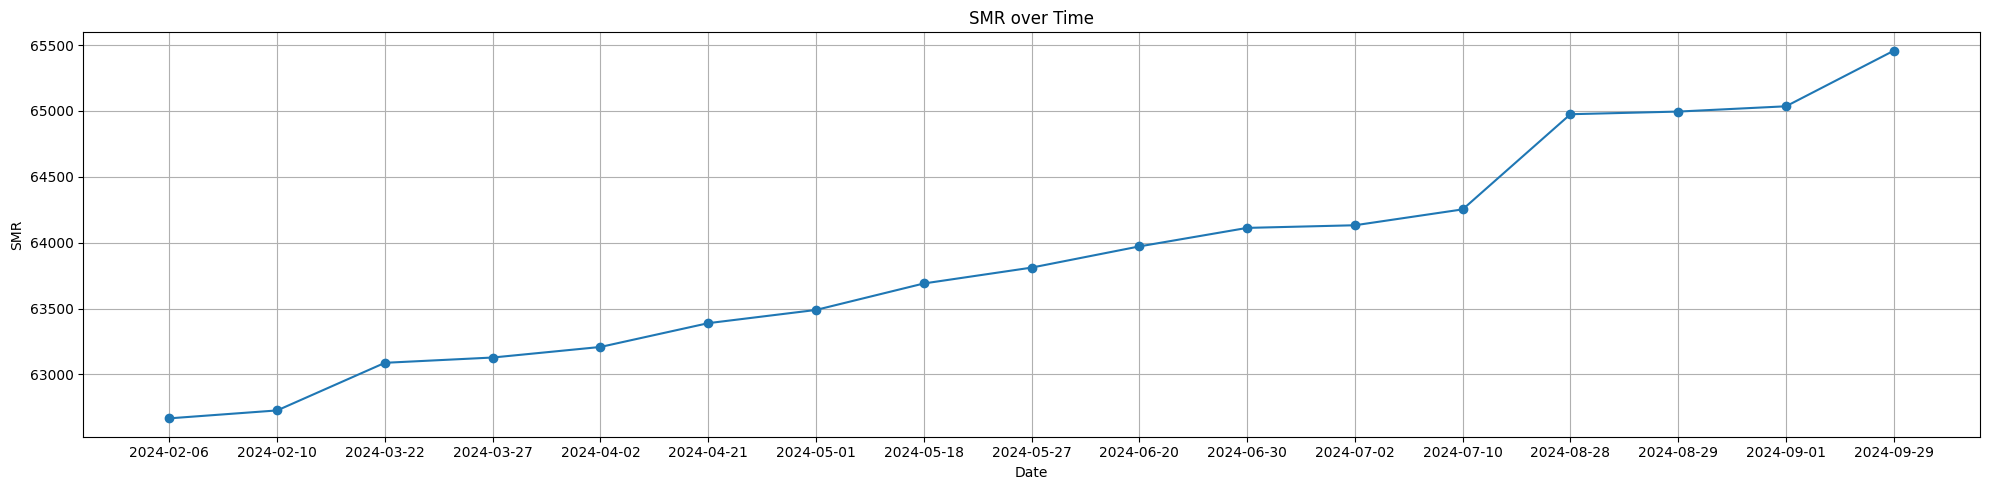

In [8]:
plt.figure(figsize=(20, 5))
plt.plot(df['calendar'], df['smr'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('SMR')
plt.title('SMR over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

#### From the data above, that SMR are always increase day by day, thats mean the Komatsu HD785-7 are always running and always load the coal. so the trend are increasing in every month.

2025-11-25 22:49:36,452 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-11-25 22:49:36,453 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


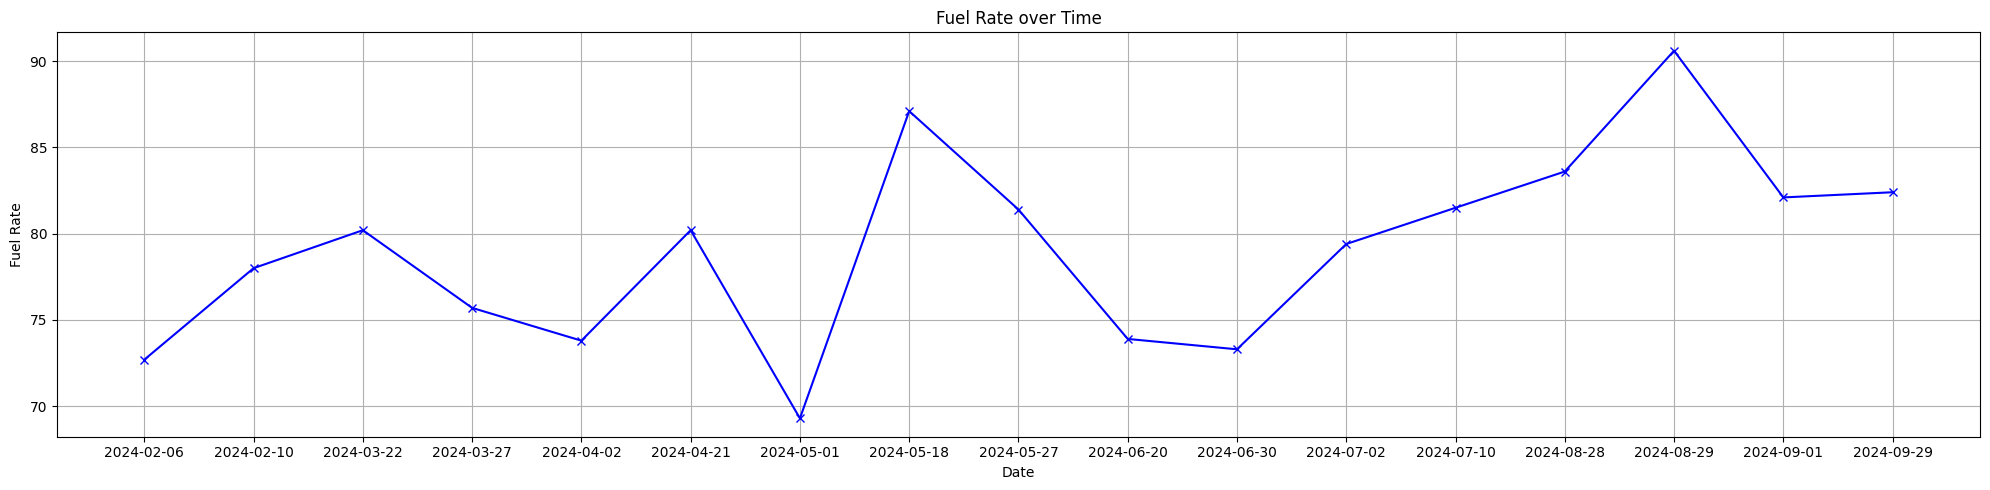

In [9]:
plt.figure(figsize=(20, 5))
plt.plot(df['calendar'], df['Fuel_Rate'], marker='x', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Fuel Rate')
plt.title('Fuel Rate over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

#### There is anomaly on 2024-05-01 where the SMR (Total Hour) are increase but the Fuel Rate are turn down, I think it might be cause of bad weather or other ground condition. This analysist are need to validate on ground team.
### but overall from that curve i could say that the trend are increase.

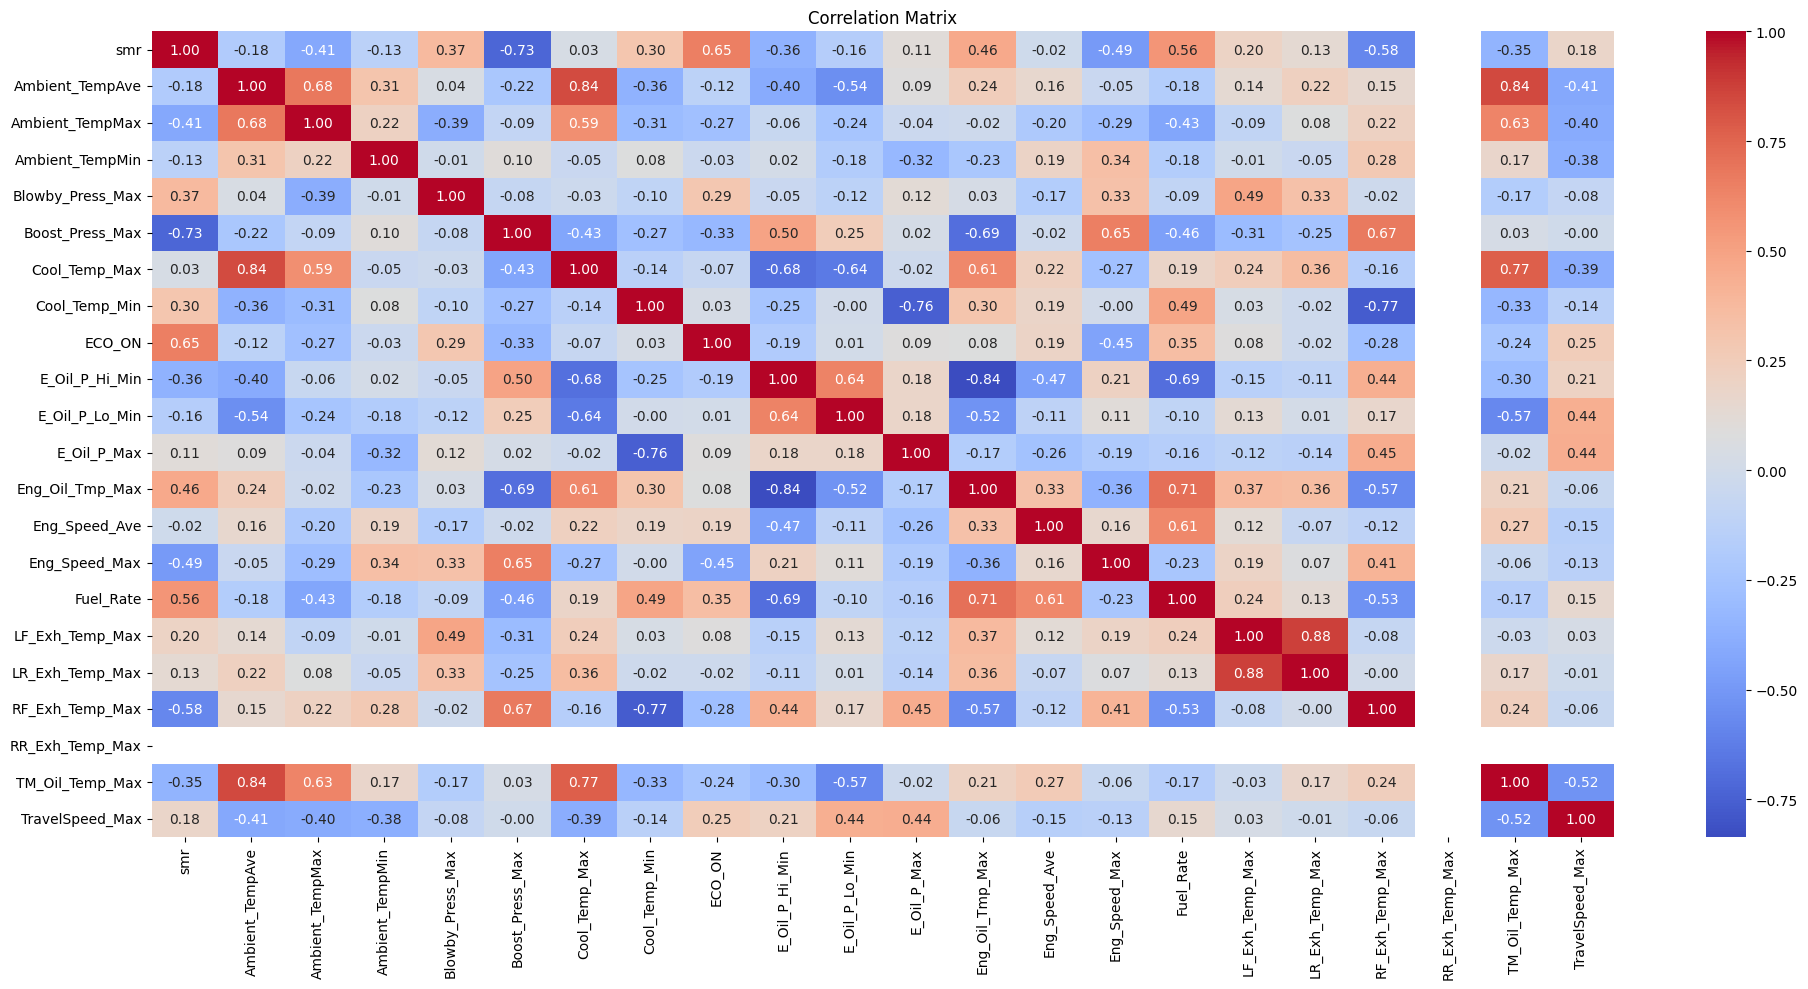

In [10]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[df.columns[1:]].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

#### From that data there are so many data are had great correlation each other

## Insight from The Data

In [11]:
config = Config().load()
gemini_llm = GeminiLLM(config=config)
response = gemini_llm.predict(prompt=PromptBuilder(unit_name="Komatsu HD785-7", data=df, data_definition=data_definition).build_prompt())
print(response.text)

Here's an analysis of the Komatsu HD785-7's sensor data, tailored for mining operation stakeholders:

**Engine Performance:**

*   **Critical Internal Wear Indicated:** The most significant concern is the **extremely high Blowby Pressure (max 1916 kPa)**. This is a strong indicator of severe internal engine wear, likely involving piston rings or cylinder liners. This condition can lead to reduced power, increased oil consumption, and potential catastrophic engine failure if not addressed.
*   **Exhaust Temperature Imbalance:** There's a notable imbalance in exhaust gas temperatures, with the **Right Rear exhaust consistently running hotter (max 969°C)** and having the highest average. This suggests potential issues with fuel injection, combustion efficiency, or turbocharger performance on that side of the engine, which could be related to the blowby issue.
*   **Generally Stable Core Temps:** Engine oil and coolant temperatures are within healthy operating ranges, indicating the coolin